In [1]:
import pyoncoprint

In [2]:
import pandas as pd

In [3]:
# Data downloaded from: https://www.cbioportal.org/results/oncoprint?Z_SCORE_THRESHOLD=2.0&RPPA_SCORE_THRESHOLD=2.0&data_priority=0&profileFilter=0&case_set_id=luad_tcga_pan_can_atlas_2018_cnaseq&gene_list=KRAS%2520HRAS%2520BRAF%2520RAF1%2520MAP3K1%2520MAP3K2%2520MAP3K3%2520MAP3K4%2520MAP3K5%2520MAP2K1%2520MAP2K2%2520MAP2K3%2520MAP2K4%2520MAP2K5%2520MAPK1%2520MAPK3%2520MAPK4%2520MAPK6%2520MAPK7%2520MAPK8%2520MAPK9%2520MAPK12%2520MAPK14%2520DAB2%2520RASSF1%2520RAB25&geneset_list=%20&tab_index=tab_visualize&Action=Submit&genetic_profile_ids_PROFILE_MUTATION_EXTENDED=luad_tcga_pan_can_atlas_2018_mutations&genetic_profile_ids_PROFILE_COPY_NUMBER_ALTERATION=luad_tcga_pan_can_atlas_2018_gistic&cancer_study_list=luad_tcga_pan_can_atlas_2018
df = pd.read_csv('./tcga.tsv', sep='\t', header=0, index_col='track_name').drop(columns=['track_type'])

In [4]:
import matplotlib.pyplot as plt
import numpy as np

cmap = plt.get_cmap('jet')

annotation_types = ['Tumor Type', 'Cancer Type', 'Sex']
annotations = {}
for idx, (annot_type, annots) in enumerate(zip(annotation_types, df.loc[annotation_types].to_numpy())):
    uniq_annots = np.unique(np.ravel(annots))
    annotations[annot_type] = {
        'annotations': annots,
        'colors': {k: v for k, v in zip(uniq_annots, cmap(np.linspace(0, 1, uniq_annots.size, dtype=float)))},
        'order': idx,
    }

In [5]:
df = df.drop(index=annotation_types)

In [6]:
# Marker definition
#
# If marker is 'fill' or 'rect': A rectangular patch will be drawn in the cell.
#     Possible keywords:
#         width and height: in ratio (from 0 to 1). The patch will be centered in the cell.
#         zindex: The index of the object in z-axis (defult is 1).
#                 The one with higher zorder is always in front of another one with lower zorder.
#         Any other keywords: kwargs for a `PatchCollection` object.
#
# If marker is a Patch object: The Patch object will be drawn in the cell.
#                              The object should be within the cell coordinates, i.e (0,0) ls bottom left, (1,1) is top right.
#     Possible keywords:
#         marker: Patch object
#         width and height: in ratio (from 0 to 1). The patch will be centered in the cell.
#         zindex: z-index.
#         Any other keywords: kwargs for a `PatchCollection` object.
#
# If marker is not any of above: Any available marker defined in `https://matplotlib.org/3.1.3/api/markers_api.html`
#                                will be drawn using 'scatter' plotting method.
#     Possible keywords:
#         zindex: z-index.
#         Any other keywords: kwargs for 'scatter', including 'marker'.

from matplotlib.patches import Polygon, Rectangle
import numpy as np

mutation_markers = {
    "Amplification": dict(
        marker="fill",
        color="red",
        zindex=0
    ),
    "Deep Deletion": dict(
        marker="fill",
        color="blue",
        zindex=0
    ),
    "Fusion": dict(
        marker="*",
        color="purple",
        lw=0,
        zindex=2
    ),
    "Inframe Mutation (putative driver)": dict(
        marker="fill",
        color="brown",
        height=0.5,
        zindex=1
    ),
    "Missense Mutation (putative driver)": dict(
        marker=Polygon([[0, 0], [1, 1], [1, 0]]),
        color="green",
        linewidth=0,
        zindex=1
    ),
    "Missense Mutation (putative passenger)": dict(
        marker="fill",
        color="lime",
        height=0.5,
        zindex=1
    ),
    "Truncating mutation (putative driver)": dict(
        marker="fill",
        color="black",
        height=0.5,
        zindex=1
    ),
    "Truncating mutation (putative passenger)": dict(
        marker="fill",
        color="yellow",
        height=0.5,
        zindex=1
    ),
}

In [7]:
small_df = df.loc[:, 'TCGA-75-5122':'TCGA-55-8616']

In [8]:
small_op = pyoncoprint.OncoPrint(small_df)

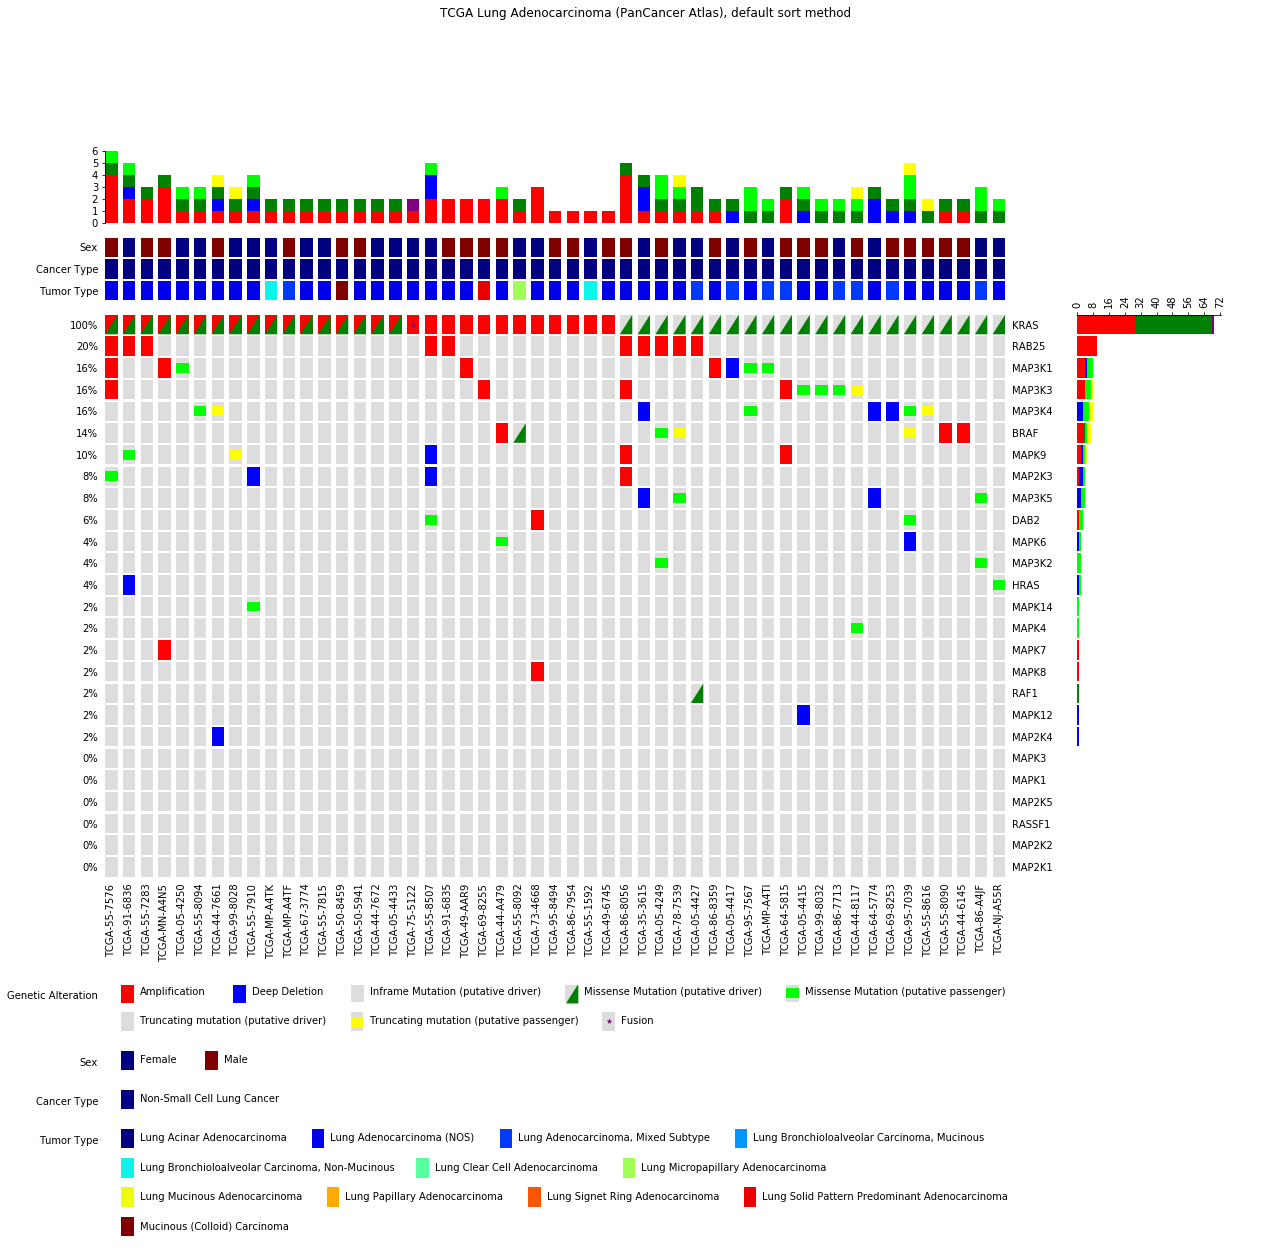

In [9]:
fig, axes = small_op.oncoprint(mutation_markers,
                         annotations=annotations,
                         figsize=[20, 20],
                         gap=[0.3, 0.1],                     # gap between cells (ratio)
                         title="TCGA Lung Adenocarcinoma (PanCancer Atlas), default sort method",
                         is_topplot=True, is_rightplot=True, is_legend=True)
# return values: figure, (oncoprint_axis, oncoprint_dual_axis, axis_top_barplot, axis_right_barplot, axis_legend)
fig.patch.set_facecolor('white')
plt.savefig("oncoprint_square.png")
pass

In [10]:
op = pyoncoprint.OncoPrint(df)

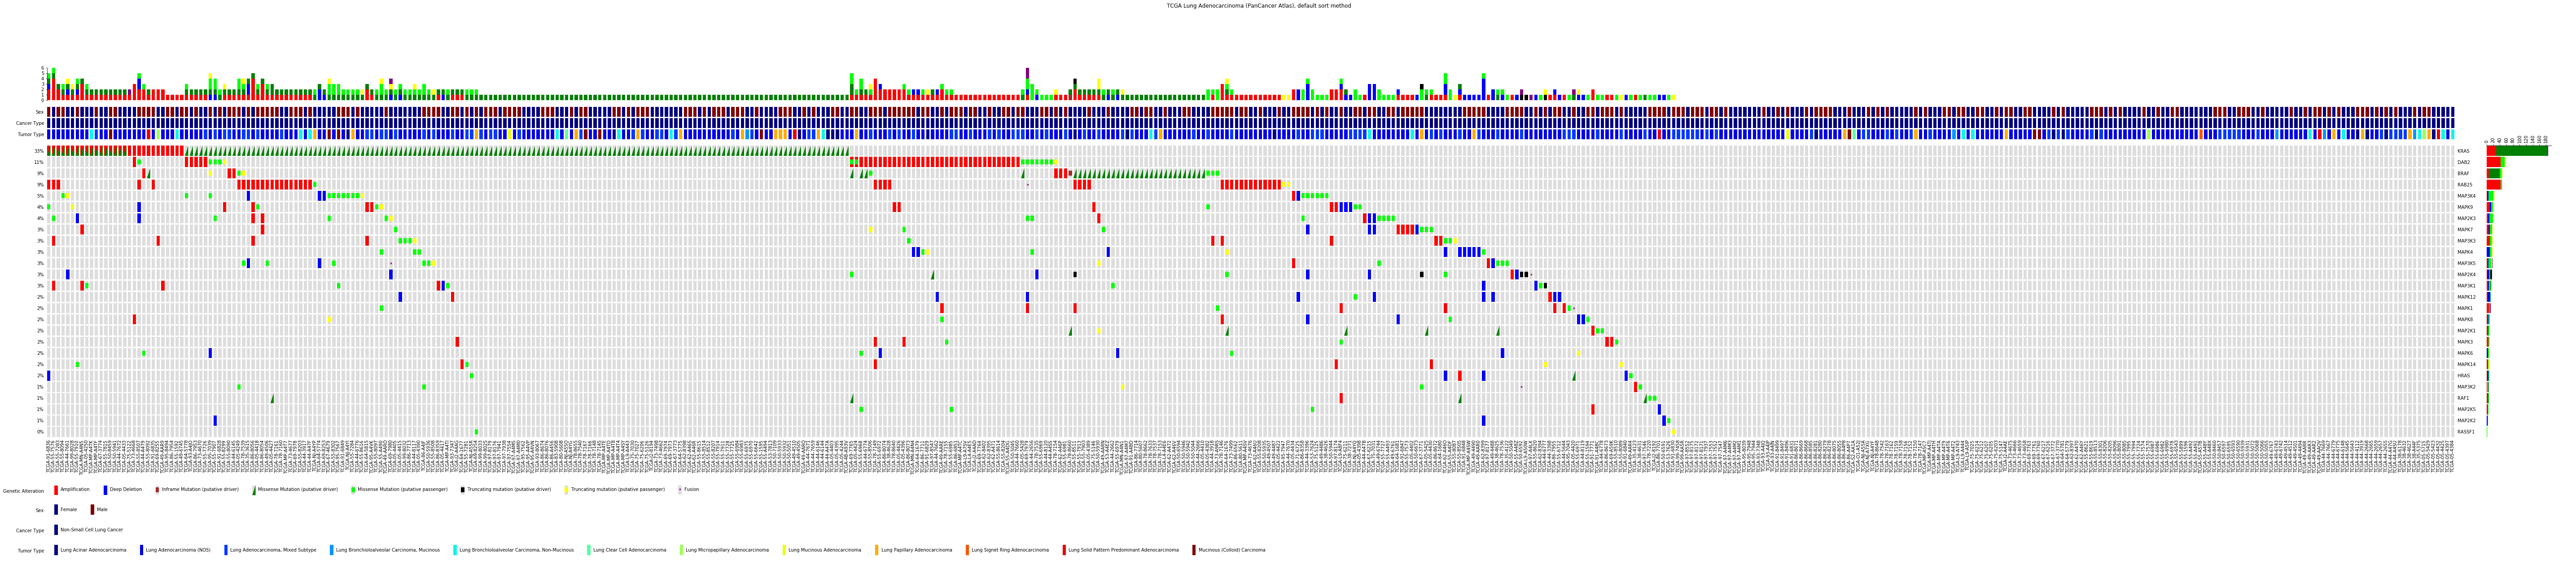

In [11]:
fig, axes = op.oncoprint(mutation_markers,
                         annotations=annotations,
                         figsize=[100, 20],
                         gap=[0.3, 0.1],                     # gap between cells (ratio)
                         title="TCGA Lung Adenocarcinoma (PanCancer Atlas), default sort method",
                         is_topplot=True, is_rightplot=True, is_legend=True)
# return values: figure, (oncoprint_axis, oncoprint_dual_axis, axis_top_barplot, axis_annotations, axis_right_barplot, axis_legend)
fig.patch.set_facecolor('white')
pass

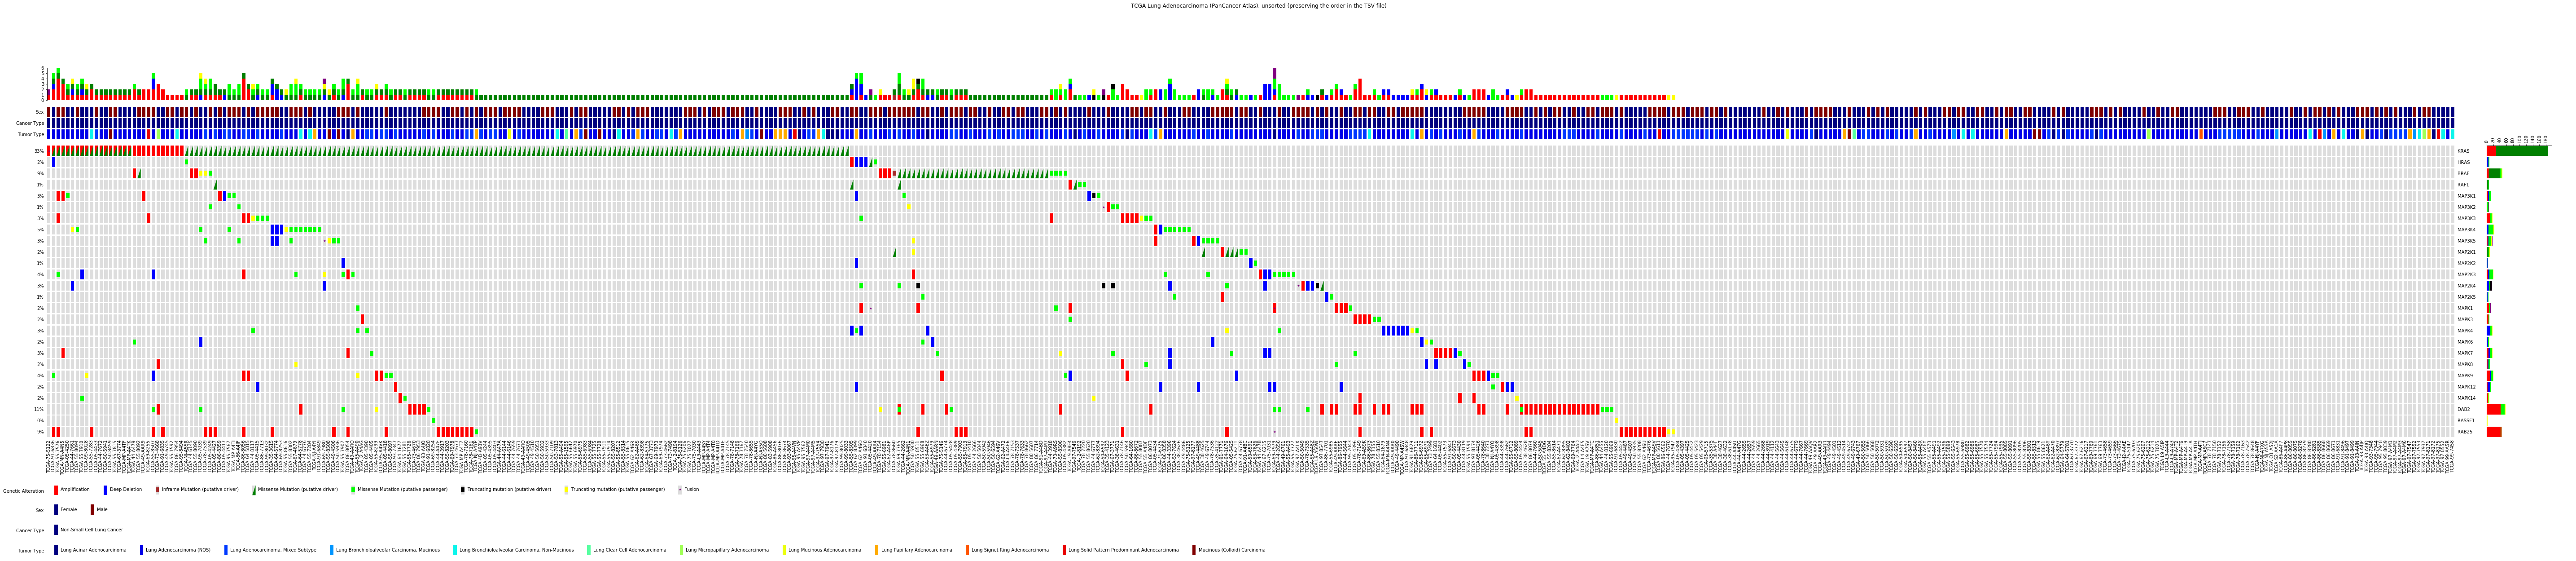

In [12]:
fig, axes = op.oncoprint(mutation_markers,
                         gene_sort_method='unsorted',
                         sample_sort_method='unsorted',
                         annotations=annotations,
                         figsize=[100, 20],
                         gap=[0.3, 0.1],                     # gap between cells (ratio)
                         title="TCGA Lung Adenocarcinoma (PanCancer Atlas), unsorted (preserving the order in the TSV file)",
                         is_topplot=True, is_rightplot=True, is_legend=True)
# return values: figure, (oncoprint_axis, oncoprint_dual_axis, axis_top_barplot, axis_annotations, axis_right_barplot, axis_legend)
fig.patch.set_facecolor('white')
pass